In [1]:
!pip install --upgrade --force-reinstall numpy matplotlib torch pandas pykan jax scikit-learn polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Solving Example 1...
checkpoint directory created: ./model
saving model version 0.0


/usr/local/lib/python3.10/dist-packages/kan/MultKAN.py:813: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/usr/local/lib/python3.10/dist-packages/kan/MultKAN.py:823: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  input_range = torch.std(preacts, dim=0) + 0.1
/usr/local/lib/python3.10/dist-packages/kan/MultKAN.py:824: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  output_range_spline = torch.std(postacts_numerical, dim

Epoch 0/150, Loss: 4.455151557922363
Epoch 10/150, Loss: 0.004327161703258753
Epoch 20/150, Loss: 6.50837246212177e-05
Epoch 30/150, Loss: 7.114805612218333e-06
Epoch 40/150, Loss: 9.054065230884589e-07
Epoch 50/150, Loss: 4.199734746634931e-07
Epoch 60/150, Loss: 4.1193760580426897e-07
Epoch 70/150, Loss: 4.050916402320581e-07
Epoch 80/150, Loss: 3.9905572180032323e-07
Epoch 90/150, Loss: 3.9357220771307766e-07
Epoch 100/150, Loss: 3.886920012519113e-07
Epoch 110/150, Loss: 3.841998363895982e-07
Epoch 120/150, Loss: 3.8004952784831403e-07
Epoch 130/150, Loss: 3.7623556181642925e-07
Epoch 140/150, Loss: 3.727822388555069e-07


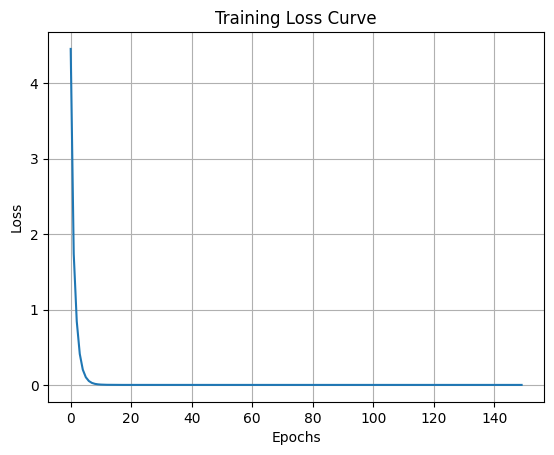

Solving Example 2...
checkpoint directory created: ./model
saving model version 0.0
Epoch 0/150, Loss: 9.822404861450195
Epoch 10/150, Loss: 0.01780850440263748
Epoch 20/150, Loss: 0.00043987680692225695
Epoch 30/150, Loss: 4.493320011533797e-05
Epoch 40/150, Loss: 1.3622689948533662e-05
Epoch 50/150, Loss: 4.933806849294342e-06
Epoch 60/150, Loss: 3.29977820001659e-06
Epoch 70/150, Loss: 3.284376361989416e-06
Epoch 80/150, Loss: 3.2763057333795587e-06
Epoch 90/150, Loss: 3.2699742860131664e-06
Epoch 100/150, Loss: 3.2641637517372146e-06
Epoch 110/150, Loss: 3.25975997839123e-06
Epoch 120/150, Loss: 3.255162027926417e-06
Epoch 130/150, Loss: 3.251866019127192e-06
Epoch 140/150, Loss: 3.2487866974406643e-06


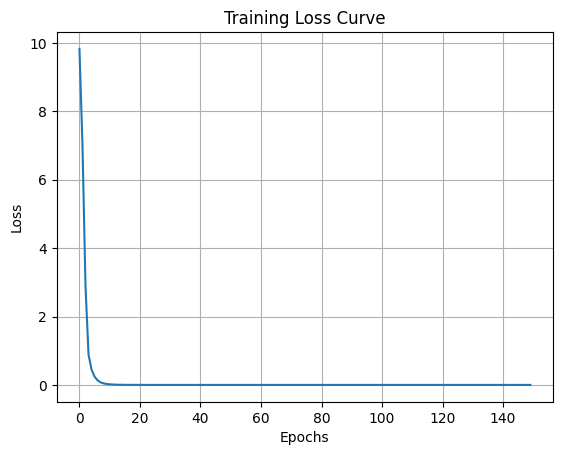

Plotting results...


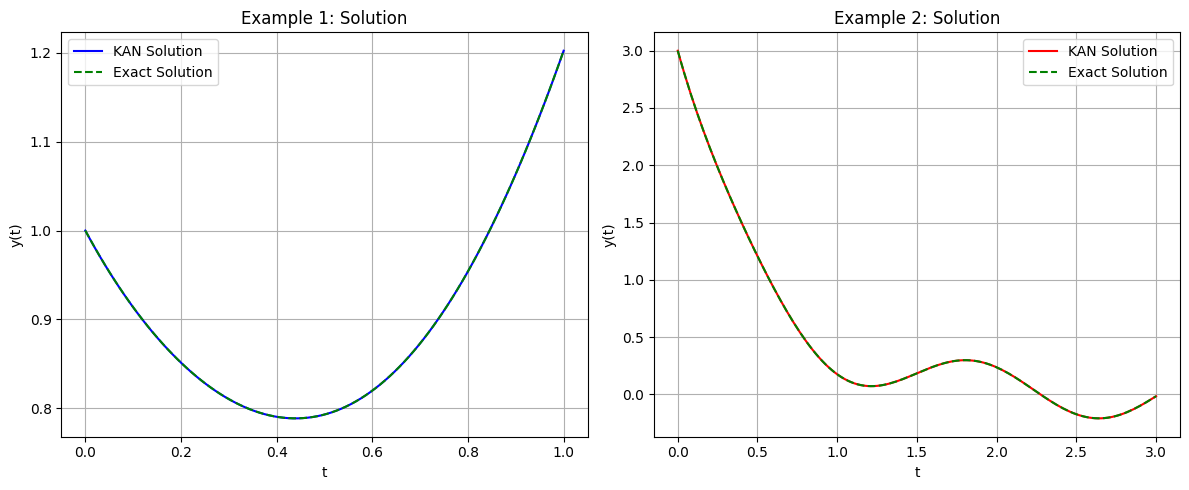

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import MultKAN

def train_model_with_physics(model, epochs, optimizer, t_train, ode_residual, ic_loss_fn, patience=50):
    model.train()

    best_loss = float('inf')
    counter = 0
    losses = []

    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            y_pred = model(t_train)
            residual_loss = torch.mean(ode_residual(t_train, y_pred)**2)
            ic_loss = ic_loss_fn(model)
            total_loss = residual_loss + ic_loss
            total_loss.backward()
            return total_loss

        loss = optimizer.step(closure)

        if loss.item() < best_loss:
            best_loss = loss.item()
            counter = 0
        else:
            counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Log and store loss
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")
        losses.append(loss.item())

    # Plot loss curve
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.grid(True)
    plt.show()

    return model

def solve_example1():
    # Define model
    model = MultKAN(width=[1, 12, 1], grid=15, k=4, device='cpu')

    # Define ODE components
    def ode_residual(t, y):
        dy_dt = torch.autograd.grad(y, t, grad_outputs=torch.ones_like(y), create_graph=True)[0]
        f_term = (t +((1 + 3 * t**2) / (1 + t + t**3))) * y
        g_term = 2 * t + t**3 + t**2 * ((1 + 3 * t**2) / (1 + t + t**3))
        return dy_dt + f_term - g_term

    def ic_loss_fn(model):
        t_bc = torch.tensor([[0.0]], requires_grad=True)
        y_bc = torch.tensor([[1.0]])
        y_pred = model(t_bc)
        return torch.mean((y_pred - y_bc)**2)

    # Training data
    t_train = torch.linspace(0, 1, 100).reshape(-1, 1).requires_grad_()

    # Define optimizer
    optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=20, tolerance_grad=1e-7, tolerance_change=1e-9, history_size=50)

    # Train model
    model = train_model_with_physics(model, epochs=150, optimizer=optimizer, t_train=t_train, ode_residual=ode_residual, ic_loss_fn=ic_loss_fn)

    # Evaluate and plot
    t_eval = torch.linspace(0, 1, 100).reshape(-1, 1).requires_grad_()
    y_pred = model(t_eval).detach().numpy()
    t_eval_np = t_eval.detach().numpy()
    y_exact_eval = (np.exp(-t_eval_np**2 / 2) + t_eval_np**5 + t_eval_np**3 + t_eval_np**2) / (t_eval_np**3 + t_eval_np + 1)

    return t_eval_np, y_pred, y_exact_eval

def solve_example2():
    # Define model
    model = MultKAN(width=[1, 12, 1], grid=15, k=4, device='cpu')

    # Define ODE components
    def ode_residual(t, y):
        dy_dt = torch.autograd.grad(y, t, grad_outputs=torch.ones_like(y), create_graph=True)[0]
        f_term = 2 * y
        g_term = torch.cos(4 * t)
        return dy_dt + f_term - g_term

    def ic_loss_fn(model):
        t_bc = torch.tensor([[0.0]], requires_grad=True)
        y_bc = torch.tensor([[3.0]])
        y_pred = model(t_bc)
        return torch.mean((y_pred - y_bc)**2)

    # Training data
    t_train = torch.linspace(0, 3, 150).reshape(-1, 1).requires_grad_()

    # Define optimizer
    optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=20, tolerance_grad=1e-7, tolerance_change=1e-9, history_size=50)

    # Train model
    model = train_model_with_physics(model, epochs=150, optimizer=optimizer, t_train=t_train, ode_residual=ode_residual, ic_loss_fn=ic_loss_fn)

    # Evaluate and plot
    t_eval = torch.linspace(0, 3, 150).reshape(-1, 1).requires_grad_()
    y_pred = model(t_eval).detach().numpy()
    t_eval_np = t_eval.detach().numpy()
    y_exact_eval = (np.sin(4 * t_eval_np) / 5 + np.cos(4 * t_eval_np) / 10 + 2.9 * np.exp(-2 * t_eval_np))

    return t_eval_np, y_pred, y_exact_eval

def plot_results(t1, y1, y1_exact, t2, y2, y2_exact):
    plt.figure(figsize=(12, 5))

    # Plot Example 1
    plt.subplot(1, 2, 1)
    plt.plot(t1, y1, 'b-', label='KAN Solution')
    plt.plot(t1, y1_exact, 'g--', label='Exact Solution')
    plt.title('Example 1: Solution')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.grid(True)
    plt.legend()

    # Plot Example 2
    plt.subplot(1, 2, 2)
    plt.plot(t2, y2, 'r-', label='KAN Solution')
    plt.plot(t2, y2_exact, 'g--', label='Exact Solution')
    plt.title('Example 2: Solution')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    print("Solving Example 1...")
    t1, y1, y1_exact = solve_example1()

    print("Solving Example 2...")
    t2, y2, y2_exact = solve_example2()

    print("Plotting results...")
    plot_results(t1, y1, y1_exact, t2, y2, y2_exact)

if __name__ == "__main__":
    main()